In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

**Data Exploration**

The goal of this project is use machine leanring to predict the LogP value for small molecules. The LogP value is the ratio of compound that would exisit in non-aquenus vs aquenous environment. It is a good measurment of the solubility of a molecule which is important in drug absorption in the body. Two logP values are given in the data, aLogP and cxLogP. They represent LogP values calculated from different software. In the model we will average them to get have single LogP value for each compound

In [5]:
df = pd.read_csv("data/chem_mol_data.csv", sep=';', on_bad_lines='skip')

In [6]:
df.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,Orphan,Records Key,Records Name
0,CHEMBL5315118,ILOPROST TROMETHAMINE,CILOPROST TROMETAMOL|ILOPROST TROMETAMOL|TROME...,Small molecule,4.0,481.63,NaN,NaN,3.54,77.76,...,1.99,ACID,C26H43NO7,CC#CCC(C)[C@H](O)/C=C/[C@@H]1[C@H]2C/C(=C/CCCC...,KZSSWXACMCYLBM-RMWNCEGRSA-N,InChI=1S/C22H32O4.C4H11NO3/c1-3-4-7-15(2)20(23...,False,0,['ILOPROST TROMETHAMINE'],['ILOPROST TROMETHAMINE']
1,CHEMBL730,NITROGLYCERIN,C01DA02|CHLORMETHINE OXIDE HYDROCHLORIDE|CORO-...,Small molecule,4.0,227.08,35.0,115.0,-1.02,157.11,...,-0.04,NEUTRAL,C3H5N3O9,O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-],SNIOPGDIGTZGOP-UHFFFAOYSA-N,InChI=1S/C3H5N3O9/c7-4(8)13-1-3(15-6(11)12)2-1...,False,0,"['GTN', '1 - Nitroglycerin', 'GTN', 'NITROGLYC...","['1,2,3-Tris-nitrooxy-propane', '1,2,3-Tris-ni..."
2,CHEMBL492,ETIDOCAINE,ETIDOCAINA|ETIDOCAINE|Etidocaine|W-19053|W-190...,Small molecule,4.0,276.42,69.0,88.0,3.75,32.34,...,-1.39,BASE,C17H28N2O,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,VTUSIVBDOCDNHS-UHFFFAOYSA-N,InChI=1S/C17H28N2O/c1-6-12-19(8-3)15(7-2)17(20...,False,0,"['35', 'Etidocaine', 'SID144206521', '26', 'Et...","['N-(2,6-Dimethyl-phenyl)-2-(ethyl-propyl-amin..."
3,CHEMBL878,METOLAZONE,DIULO|METAZOLINE|METENIX|METOLAZONA|METOLAZONE...,Small molecule,4.0,365.84,165.0,562.0,2.71,92.50,...,-1.18,NEUTRAL,C16H16ClN3O3S,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2NC1C,AQCHWTWZEMGIFD-UHFFFAOYSA-N,InChI=1S/C16H16ClN3O3S/c1-9-5-3-4-6-14(9)20-10...,False,0,"['Metolazone', 'Metolazone', 'Metolazone', 'NC...","['7-Chloro-2-methyl-4-oxo-3-o-tolyl-1,2,3,4-te..."
4,CHEMBL1529,DIPHENIDOL HYDROCHLORIDE,CEPHADOL|DIPHENIDOL HCL|DIPHENIDOL HYDROCHLORI...,Small molecule,4.0,345.91,18.0,31.0,4.19,23.47,...,-0.59,BASE,C21H28ClNO,Cl.OC(CCCN1CCCCC1)(c1ccccc1)c1ccccc1,AVZIYZHXZAYGJS-UHFFFAOYSA-N,InChI=1S/C21H27NO.ClH/c23-21(19-11-4-1-5-12-19...,False,0,"['SID85273789', '1a', '2', 'DIPHENIDOL HYDROCH...","['SID85273789', '1-(4-Hydroxy-4,4-diphenyl-but..."


In [7]:
df.columns

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key',
       'Inchi', 'Withdrawn Flag', 'Orphan', 'Records Key', 'Records Name'],
      dtype='object')

In [8]:
len(df)

3637

In [9]:
alogp_mean = np.mean(df['AlogP'])
alogP_std = np.std(df['AlogP'])
alogP_med = np.nanmedian(df['AlogP'])

clogp_mean = np.mean(df['CX LogP'])
clogP_std = np.std(df['CX LogP'])
clogP_med = np.nanmedian(df['CX LogP'])


print(f'For alogP, the mean is {alogp_mean} and the standard deviation is {alogP_std}. For clogP, the mean is {clogp_mean} and the standard deviation is {clogP_std}')

For alogP, the mean is 2.613039306716187 and the standard deviation is 2.255543873635669. For clogP, the mean is 2.0598204890126897 and the standard deviation is 2.626411945562691


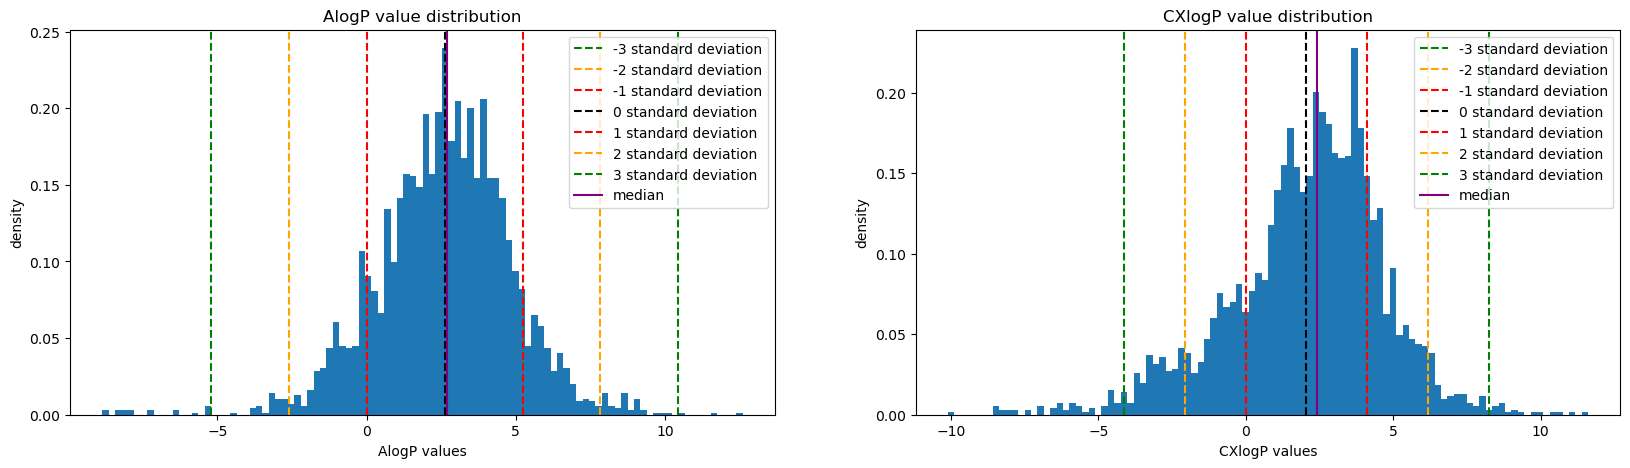

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax = ax.ravel()
sd = [-3,-2,-1,0,1,2,3]

color_math = ['black', 'red', 'orange', 'green']

for i in sd:
    ax[0].axvline(x=(alogp_mean+alogp_mean*i), linestyle='--', color=color_math[abs(i)], label=f'{i} standard deviation')

ax[0].axvline(x=alogP_med, color='purple', label='median')
ax[0].hist(df['AlogP'], density=True, bins=100)
ax[0].set_title('AlogP value distribution')
ax[0].set_ylabel("density")
ax[0].set_xlabel("AlogP values")
ax[0].legend(loc='upper right')

for i in sd:
    ax[1].axvline(x=(clogp_mean+clogp_mean*i), linestyle='--', color=color_math[abs(i)],  label=f'{i} standard deviation')

ax[1].axvline(x=clogP_med, color='purple', label='median')
ax[1].hist(df['CX LogP'], density=True, bins=100)
ax[1].set_title('CXlogP value distribution')
ax[1].set_ylabel("density")
ax[1].set_xlabel("CXlogP values")
ax[1].legend(loc='upper right')

Above is a plot of the distribution of the logP values. In the alogP values, the distribution is normal with no to little relvent skewness since the mean and median match. For the clogP distribtion it is a right skewed distribution. This should not be too much of an issue though since the distribution is still normal and the range of the values doesnt span different magnitudes.

In [11]:
df_num = df.select_dtypes(include='number')

In [12]:
df_num.columns

Index(['Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'QED Weighted', 'CX Acidic pKa', 'CX Basic pKa',
       'CX LogP', 'CX LogD', 'Aromatic Rings', 'Inorganic Flag', 'Heavy Atoms',
       'HBA (Lipinski)', 'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score', 'Orphan'],
      dtype='object')

In [13]:
len(df_num.columns)

24

In [14]:
df_num.head()

,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,#RO5 Violations,#Rotatable Bonds,...,CX LogD,Aromatic Rings,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Orphan
0,4.0,481.63,NaN,NaN,3.54,77.76,3.0,3.0,0.0,8.0,...,0.89,0.0,0,26.0,4.0,3.0,0.0,360.2301,1.99,0
1,4.0,227.08,35.0,115.0,-1.02,157.11,9.0,0.0,0.0,8.0,...,0.26,0.0,0,15.0,12.0,0.0,1.0,227.0026,-0.04,0
2,4.0,276.42,69.0,88.0,3.75,32.34,2.0,1.0,0.0,7.0,...,3.25,1.0,0,20.0,3.0,1.0,0.0,276.2202,-1.39,0
3,4.0,365.84,165.0,562.0,2.71,92.50,4.0,2.0,0.0,2.0,...,2.94,2.0,0,24.0,6.0,3.0,0.0,365.0601,-1.18,0
4,4.0,345.91,18.0,31.0,4.19,23.47,2.0,1.0,0.0,6.0,...,2.39,2.0,0,23.0,2.0,1.0,0.0,309.2093,-0.59,0


Now the goal is to see the distribution spread in all the numerical data that will be used in the model. A few variables, like Max Phase, targets, bioactivites, etc will be removed since they are not intrinstic to the molecule itself but depends on the environment

In [15]:
df_num_2 = df_num.drop(columns=['Bioactivities', 'Max Phase', 'Targets', 'Orphan'])

In [16]:
len(df_num_2.columns)

20

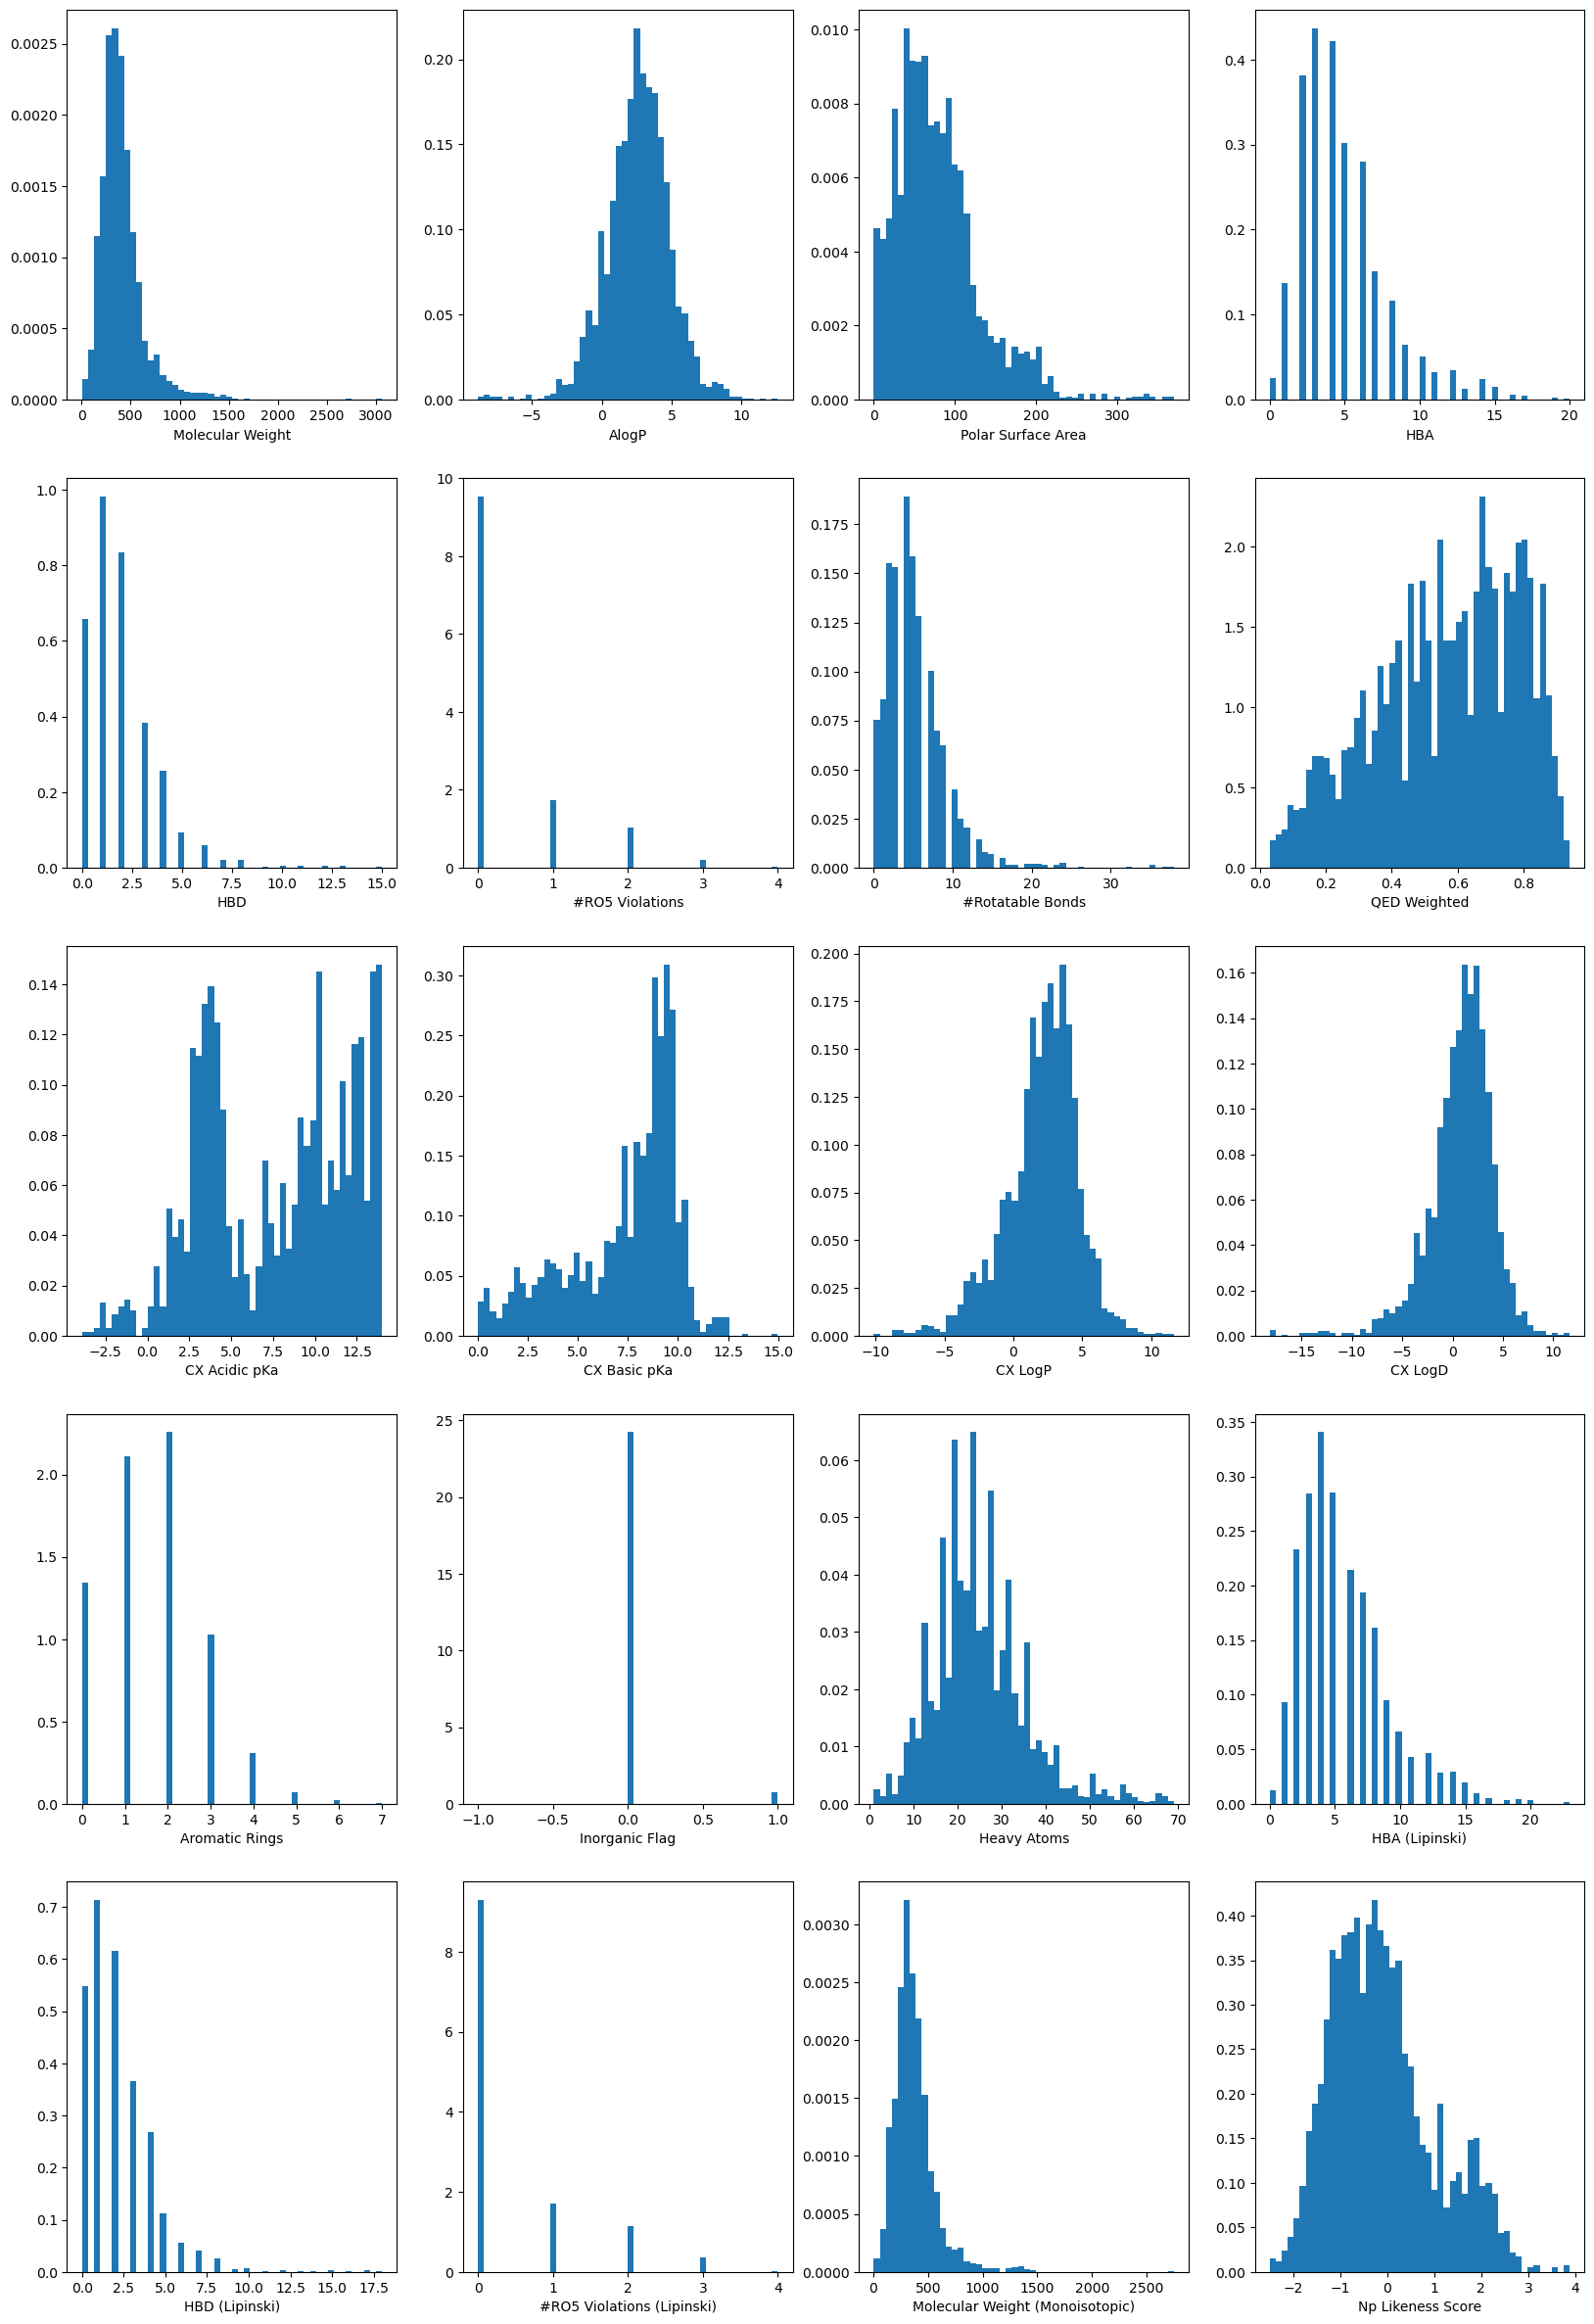

In [17]:
fig, ax = plt.subplots(5, 4, figsize=(20,30))
ax = ax.ravel()

all_cols = df_num_2.columns
for i in range(20):
    ax[i].hist(df_num_2[all_cols[i]], density=True, bins=50)
    ax[i].set_xlabel(all_cols[i])

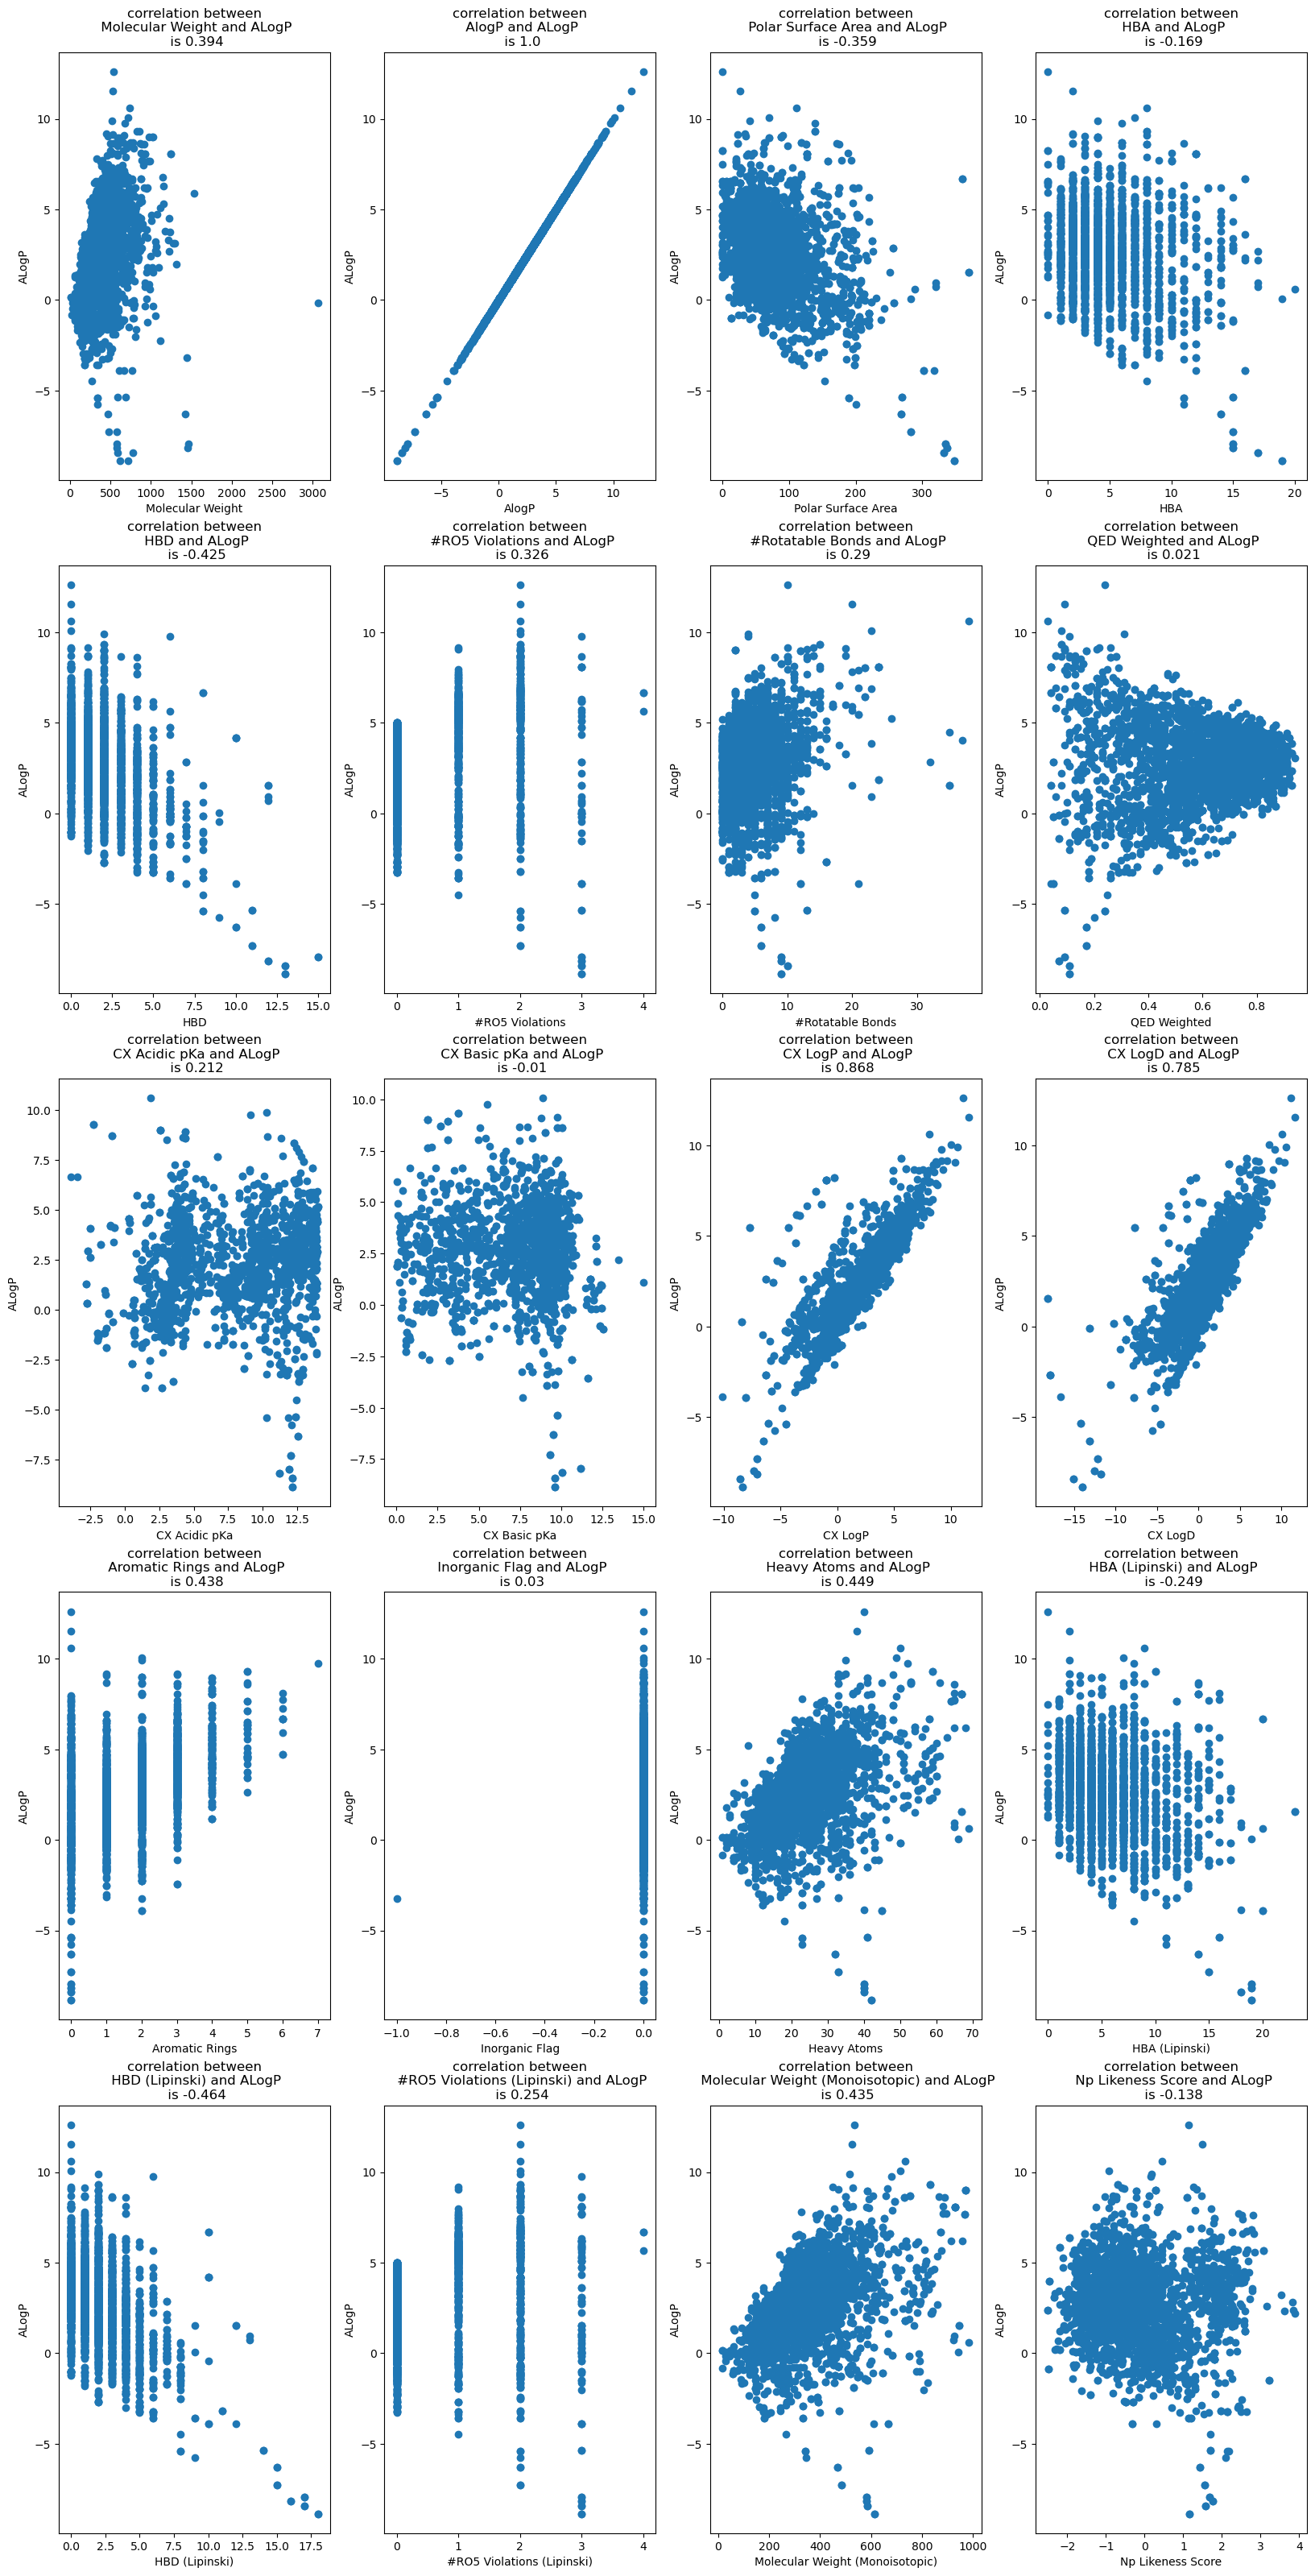

In [18]:
fig, ax = plt.subplots(5, 4, figsize=(20,40))
ax = ax.ravel()

all_cols = df_num_2.columns
for i in range(20):
    corr, p_value = spearmanr(df_num_2[all_cols[i]], df_num_2['AlogP'], nan_policy='omit')
    ax[i].scatter(df_num_2[all_cols[i]], df_num_2['AlogP'])
    ax[i].set_xlabel(all_cols[i])
    ax[i].set_ylabel('ALogP')
    ax[i].set_title(f"correlation between\n {all_cols[i]} and ALogP\n is {round(corr,3)}")

For the variables not related to distrubtion between hydrophobic and hydrophilic environment, we see very low correlations between the AlogP value. For example molecular weight has avergae correlation ~ 0.4, hydrogen bond donor -0.46,  number of heavy atoms 0.45, and polar surface area -0.36. Other variables, like number of aromatic rings and #RO5 violations are caterogical variables so there correlation is not considered. 

This weak correlation does not suit itslef well for normal linear regression. There could be more impactful non-linear relationships between the variables